In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# For model building 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


In [148]:
#Reading the dataset

df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [150]:
# Data cleaning is required as there are null values exists in the dataset

df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [151]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


In [152]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [153]:
#Dropping following columns since it has more null values
#'LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'
df = df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')
df



,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,2010,WD,Normal,142125


In [154]:
#will try to convert the Year columns with the age where we are going to fill these columns with number 

df['YearBuilt_Old'] = df.YearBuilt.max()-df.YearBuilt
df['YearRemodAdd_Old'] = df.YearRemodAdd.max()-df.YearRemodAdd
df['GarageYrBlt_Old'] = df.GarageYrBlt.max()-df.GarageYrBlt
df['YrSold_Old'] = df.YrSold.max()-df.YrSold
df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,2003,2003,2003.0,2008,7,7,7.0,2
1,1976,1976,1976.0,2007,34,34,34.0,3
2,2001,2002,2001.0,2008,9,8,9.0,2
3,1915,1970,1998.0,2006,95,40,12.0,4
4,2000,2000,2000.0,2008,10,10,10.0,2
...,...,...,...,...,...,...,...,...
1455,1999,2000,1999.0,2007,11,10,11.0,3
1456,1978,1988,1978.0,2010,32,22,32.0,0
1457,1941,2006,1941.0,2010,69,4,69.0,0
1458,1950,1996,1950.0,2010,60,14,60.0,0


In [155]:
#Dropping the original year columns as we created new columns with year_old
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [156]:
df.shape

(1460, 74)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   object 
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   object 
 5   LotShape          1460 non-null   object 
 6   LandContour       1460 non-null   object 
 7   Utilities         1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   int64  
 16  OverallCond       1460 non-null   int64  


In [158]:
df.notnull().sum()

Id                  1460
MSSubClass          1460
MSZoning            1460
LotArea             1460
Street              1460
LotShape            1460
LandContour         1460
Utilities           1460
LotConfig           1460
LandSlope           1460
Neighborhood        1460
Condition1          1460
Condition2          1460
BldgType            1460
HouseStyle          1460
OverallQual         1460
OverallCond         1460
RoofStyle           1460
RoofMatl            1460
Exterior1st         1460
Exterior2nd         1460
MasVnrType          1452
MasVnrArea          1452
ExterQual           1460
ExterCond           1460
Foundation          1460
BsmtQual            1423
BsmtCond            1423
BsmtExposure        1422
BsmtFinType1        1423
BsmtFinSF1          1460
BsmtFinType2        1422
BsmtFinSF2          1460
BsmtUnfSF           1460
TotalBsmtSF         1460
Heating             1460
HeatingQC           1460
CentralAir          1460
Electrical          1459
1stFlrSF            1460


In [159]:
#Columnns ID, Street and Utilities are not needed. Droppoing them
df = df.drop(['Street','Utilities','Id'],axis='columns')
df.shape

(1460, 71)

In [160]:
#Adding Missing values
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageYrBlt_Old.fillna(-1,inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

In [161]:
df.notnull().sum()

MSSubClass          1460
MSZoning            1460
LotArea             1460
LotShape            1460
LandContour         1460
LotConfig           1460
LandSlope           1460
Neighborhood        1460
Condition1          1460
Condition2          1460
BldgType            1460
HouseStyle          1460
OverallQual         1460
OverallCond         1460
RoofStyle           1460
RoofMatl            1460
Exterior1st         1460
Exterior2nd         1460
MasVnrType          1460
MasVnrArea          1460
ExterQual           1460
ExterCond           1460
Foundation          1460
BsmtQual            1460
BsmtCond            1460
BsmtExposure        1460
BsmtFinType1        1460
BsmtFinSF1          1460
BsmtFinType2        1460
BsmtFinSF2          1460
BsmtUnfSF           1460
TotalBsmtSF         1460
Heating             1460
HeatingQC           1460
CentralAir          1460
Electrical          1459
1stFlrSF            1460
2ndFlrSF            1460
LowQualFinSF        1460
GrLivArea           1460


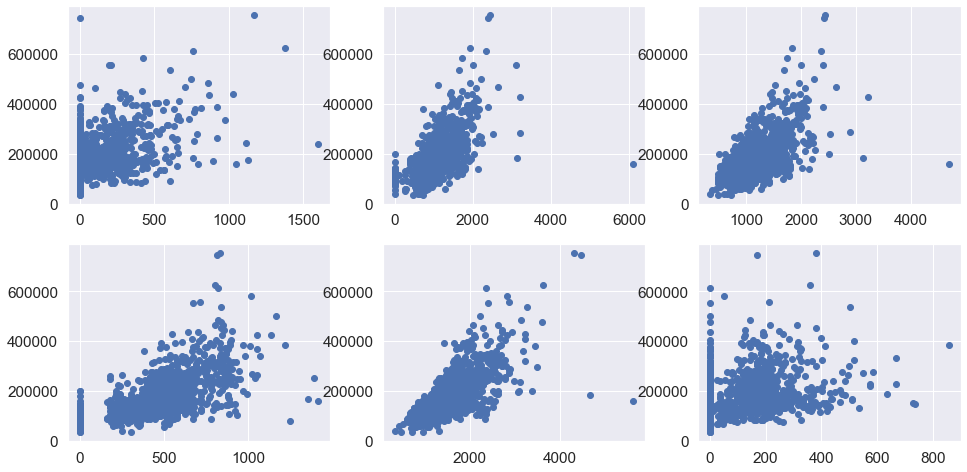

In [162]:
#lets draw the graph for EDA
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)

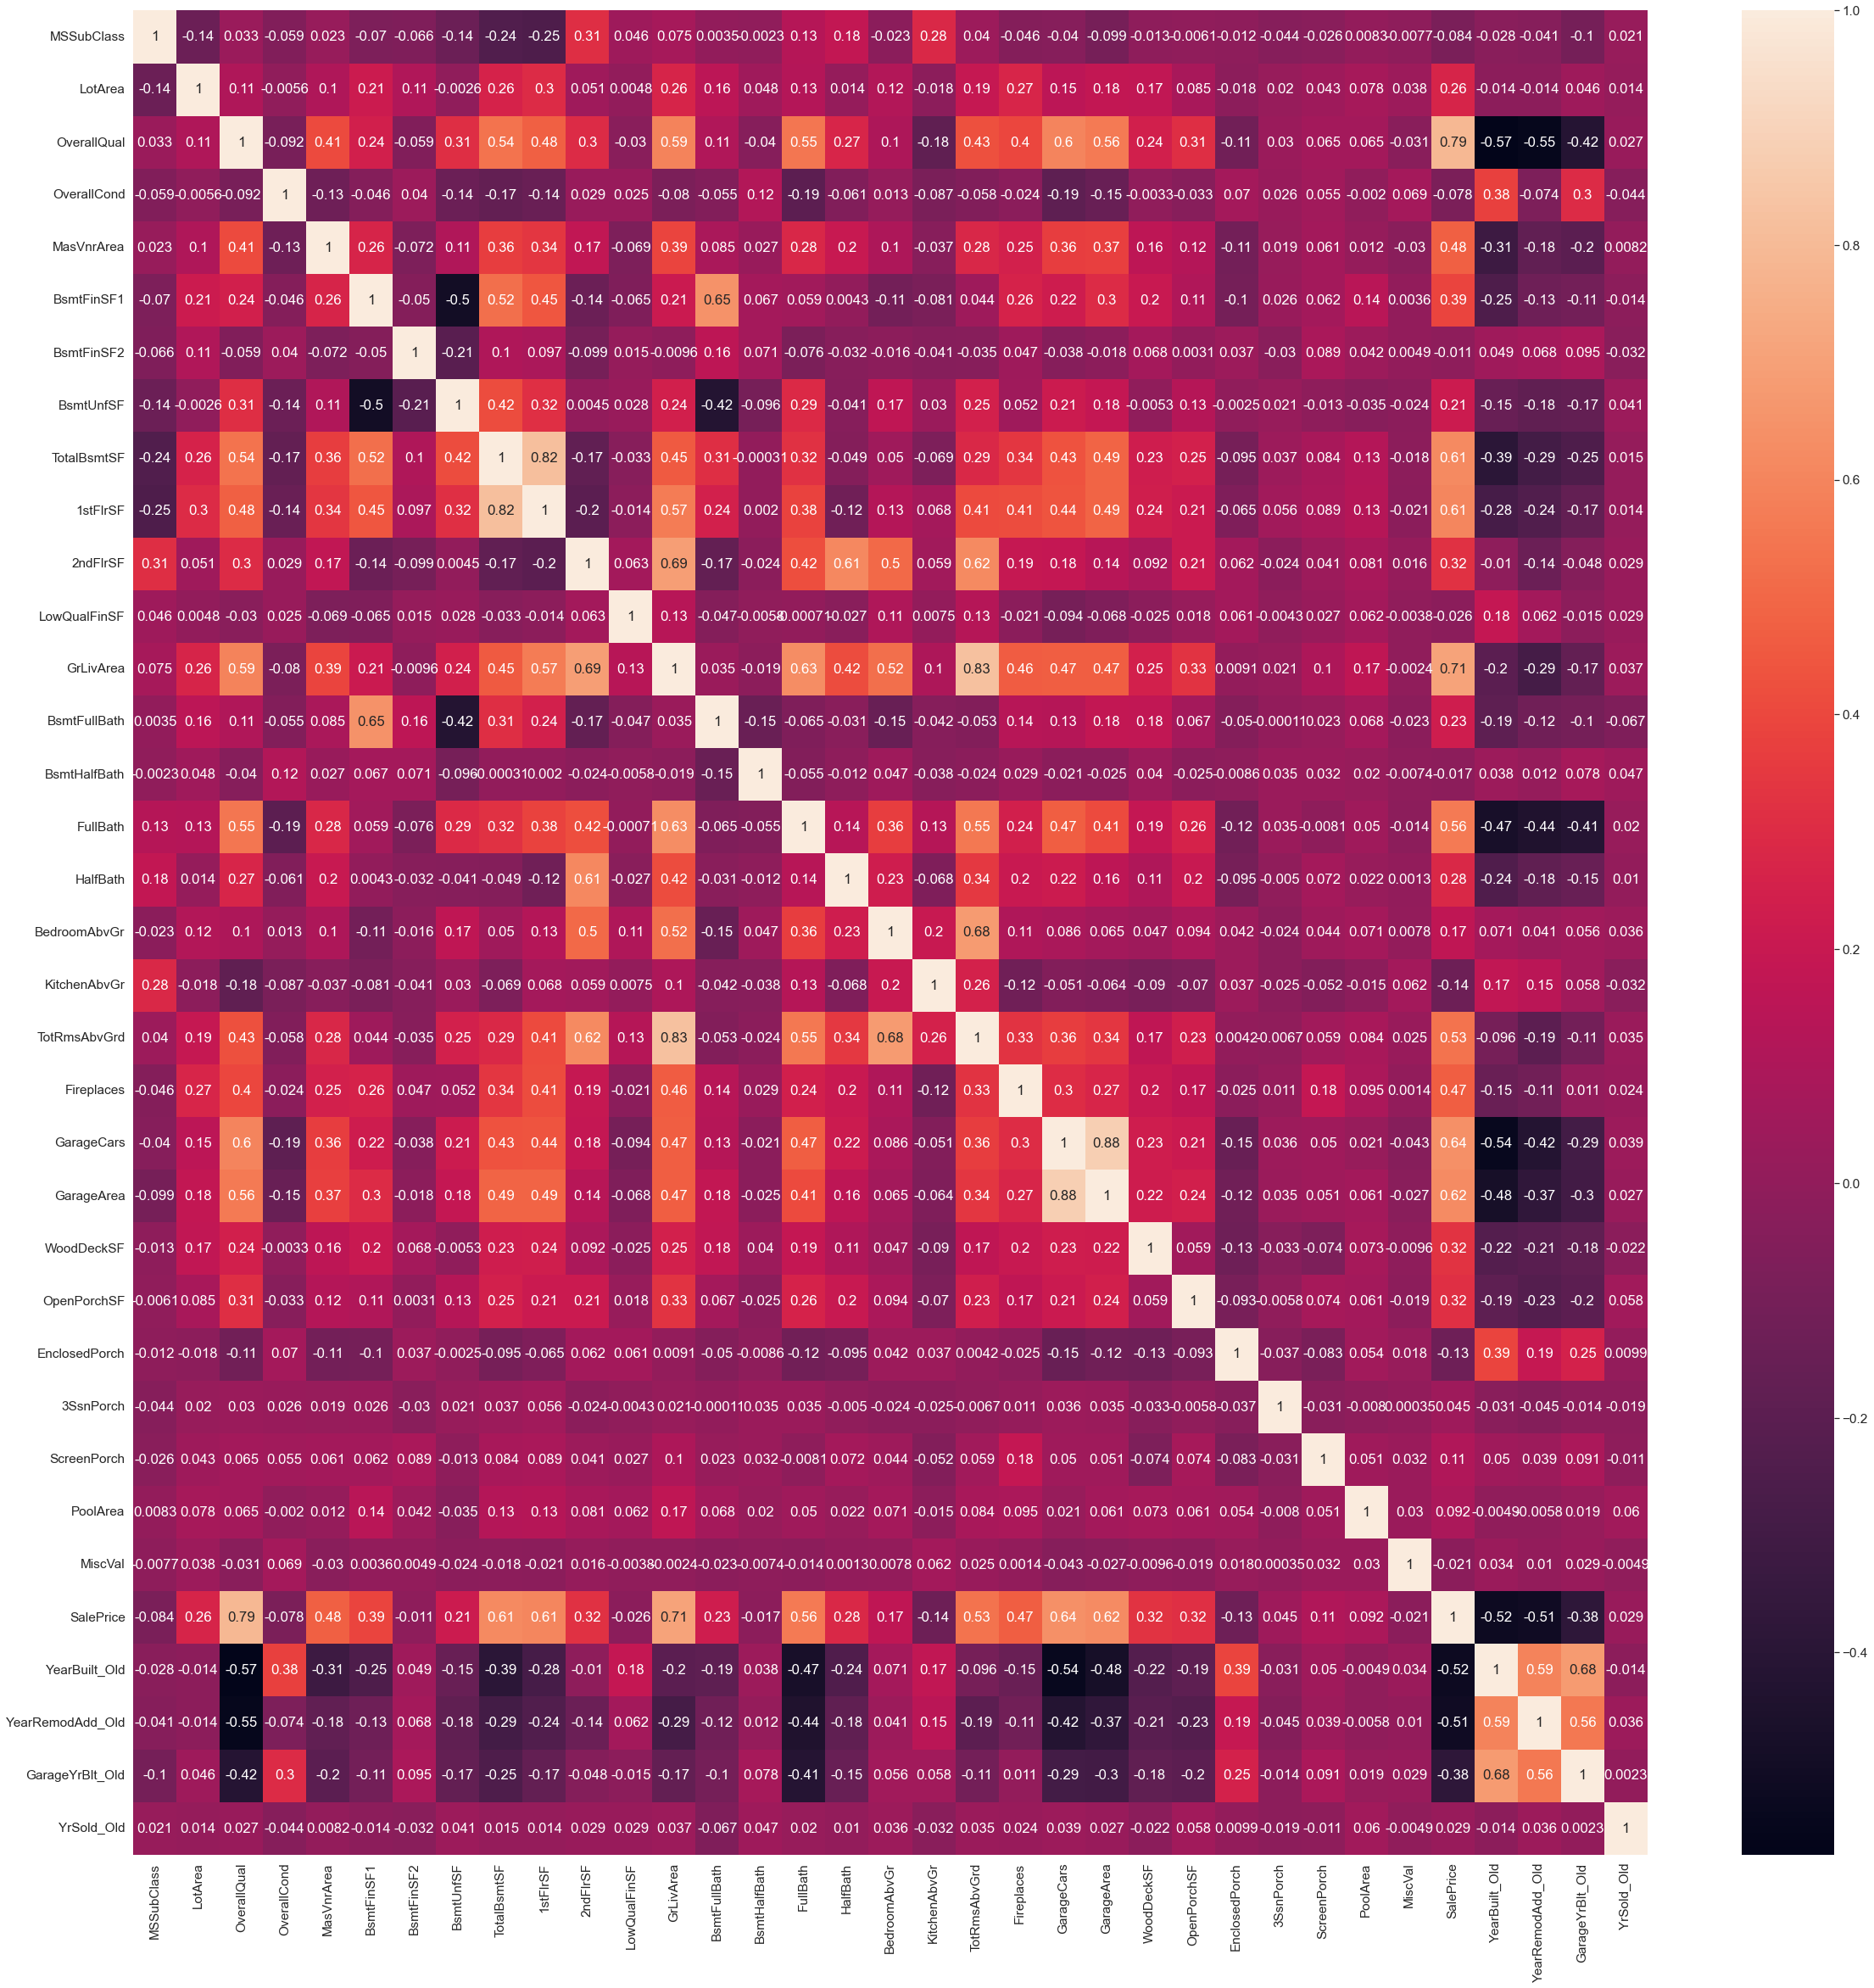

In [163]:
sns.set(font_scale=1.4)

plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [164]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']]

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gtl,TA,Gd,TA,No,Unf,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
1456,Gtl,TA,Gd,TA,No,ALQ,Rec,TA,Y,TA,Unf,TA,TA,TA,Reg
1457,Gtl,Ex,TA,Gd,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,Gd,Reg
1458,Gtl,TA,TA,TA,Mn,GLQ,Rec,Gd,Y,Gd,Unf,TA,TA,TA,Reg


In [165]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [166]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']]

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,2,4,3,1,1,1,4,1,2,2,3,3,2,3
1456,0,2,4,3,1,5,3,2,1,2,1,3,3,2,3
1457,0,4,3,4,1,6,1,4,1,3,2,3,3,3,3
1458,0,2,3,3,2,6,3,3,1,3,1,3,3,2,3


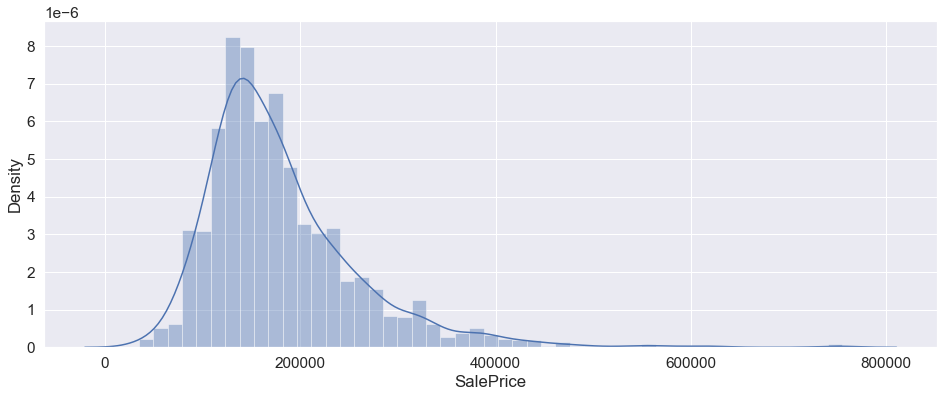

In [167]:
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotArea           1460 non-null   int64  
 3   LotShape          1460 non-null   int64  
 4   LandContour       1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   LandSlope         1460 non-null   int64  
 7   Neighborhood      1460 non-null   object 
 8   Condition1        1460 non-null   object 
 9   Condition2        1460 non-null   object 
 10  BldgType          1460 non-null   object 
 11  HouseStyle        1460 non-null   object 
 12  OverallQual       1460 non-null   int64  
 13  OverallCond       1460 non-null   int64  
 14  RoofStyle         1460 non-null   object 
 15  RoofMatl          1460 non-null   object 
 16  Exterior1st       1460 non-null   object 


In [169]:
#create dummy columns

dummy_col = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

df = pd.concat([df,dummy_col],axis='columns')

df = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

In [170]:
#Linear Regression

# prepare the training and test set
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [171]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [172]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

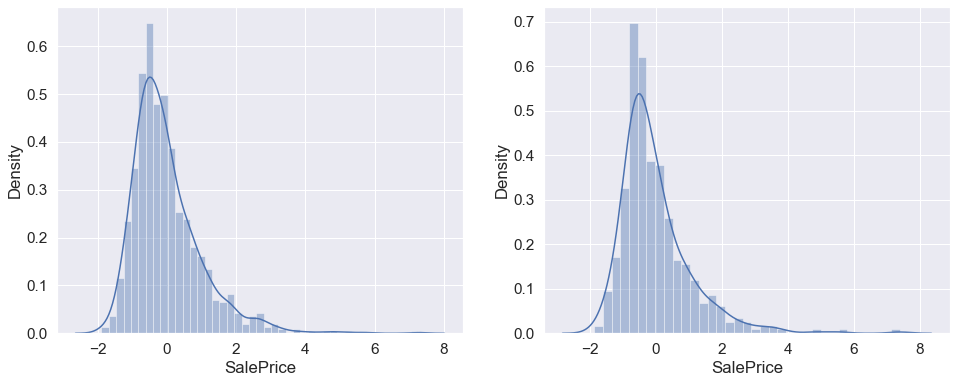

In [173]:
#check the distribution after scaling

plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [174]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [175]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [176]:
X_train.shape


(1021, 194)

In [177]:
y_train.shape

(1021,)

In [178]:
len(X_train.columns)

194

In [179]:
lm  = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [180]:
# Predictions on the basis of the model
y_pred = lm.predict(X_train)
y_pred

array([-0.0943918 , -0.84922087,  0.57717858, ..., -0.45324141,
       -0.83565043, -0.15770468])

In [181]:
r2_score(y_train, y_pred) 

0.9186742193021311

In [182]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_pred))
print(rss)
mse = mean_squared_error(y_train, y_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

83.03362209252411
0.08132578069786886
0.2851767534317425


In [183]:
#since we have multiple feature columns, calculating RSS, MSE and RMSE values by trimming the negative predictions
# going with RFE approach

lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [184]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False, False,
        True, False,  True, False, False, False, False,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True,

In [185]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [186]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [187]:
rfe_sel_columns #These are the selected feaures 

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtQual',
 'BsmtExposure',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenQual',
 'GarageArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_FR3',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_RRNn',
 'Condition2_PosN',
 'Condition2_RRAe',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'RoofStyle_Gable',
 'RoofMatl_CompShg',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_Stucco',
 'Exterior1st_WdShing',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Exterior2nd_VinylSd',
 'MasVnrType_BrkFace',
 'MasVnrType_None',

In [188]:
# train test preparation with the selected columns

X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [189]:
#try with the Lasso regression
lambdas = [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
for i in lambdas:
    lm = Lasso(alpha=i)
    lm.fit(X_train,y_train)

    print("\n Alpha: "+str(i))
    y_train_pred = lm.predict(X_train)
    print(r2_score(y_true=y_train,y_pred=y_train_pred))

    y_test_pred  = lm.predict(X_test)
    print(r2_score(y_true=y_test,y_pred=y_test_pred))
    
    


 Alpha: 0.0001
0.891874509240167
0.7822613537288515

 Alpha: 0.001
0.8500323798985484
0.8689284839819094

 Alpha: 0.01
0.805487497328248
0.8472527444522627

 Alpha: 0.05
0.7739513640601732
0.8134015605967576

 Alpha: 0.1
0.7426949679507285
0.7756036288705226

 Alpha: 0.2
0.6729431016975792
0.6946849981635841

 Alpha: 0.3
0.5936950396760916
0.6025572905027443

 Alpha: 0.4
0.49498472507300406
0.4967542955587849

 Alpha: 0.5
0.38134805415201745
0.37921049203595925

 Alpha: 0.6
0.25612706915390704
0.25298181473749803

 Alpha: 0.7
0.12612706915390715
0.123816727854692

 Alpha: 0.8
0.0
-0.0002467353593229582

 Alpha: 0.9
0.0
-0.0002467353593229582

 Alpha: 1.0
0.0
-0.0002467353593229582

 Alpha: 2.0
0.0
-0.0002467353593229582

 Alpha: 3.0
0.0
-0.0002467353593229582

 Alpha: 4.0
0.0
-0.0002467353593229582

 Alpha: 5.0
0.0
-0.0002467353593229582

 Alpha: 6.0
0.0
-0.0002467353593229582

 Alpha: 7.0
0.0
-0.0002467353593229582

 Alpha: 8.0
0.0
-0.0002467353593229582

 Alpha: 9.0
0.0
-0.000246735

In [190]:
##from the above result, Lasso is giving the best predictions with the alpha value: 0.001

#  Alpha: 0.001
# 0.8500323798985484
# 0.8689284839819094


In [191]:
ridge_coef = pd.DataFrame(list(zip(X_train.columns,lm.coef_)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,LotArea,0.0
44,Exterior1st_HdBoard,-0.0
50,MasVnrType_BrkFace,0.0
49,Exterior2nd_VinylSd,0.0
48,Exterior2nd_ImStucc,0.0
47,Exterior2nd_CBlock,-0.0
46,Exterior1st_WdShing,-0.0
45,Exterior1st_Stucco,0.0
43,Exterior1st_CBlock,-0.0
52,MasVnrType_Stone,0.0


In [192]:
#try with the Ridge Regression
lambdas = [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
for i in lambdas:
    lm = Ridge(alpha=i)
    lm.fit(X_train,y_train)

    print("Alpha: "+str(i))
    y_train_pred = lm.predict(X_train)
    print(r2_score(y_true=y_train,y_pred=y_train_pred))

    y_test_pred  = lm.predict(X_test)
    print(r2_score(y_true=y_test,y_pred=y_test_pred))
    print("\n")


Alpha: 0.0001
0.8926781334773949
0.7534171336265045


Alpha: 0.001
0.8926746856843517
0.7554245186788151


Alpha: 0.01
0.8923816612086009
0.7729398049307126


Alpha: 0.05
0.8885710266261895
0.8169177370182845


Alpha: 0.1
0.8832312454473672
0.8393465816699135


Alpha: 0.2
0.8754491397981329
0.854911980374347


Alpha: 0.3
0.8705094930391224
0.8599506058152625


Alpha: 0.4
0.8671245039183317
0.8620408078931744


Alpha: 0.5
0.8646361165115017
0.8630265781964621


Alpha: 0.6
0.8627054751832732
0.8635230126513612


Alpha: 0.7
0.8611446619578457
0.8637781720029831


Alpha: 0.8
0.8598420864275881
0.8639056229278373


Alpha: 0.9
0.8587275928493969
0.8639622478212496


Alpha: 1.0
0.8577549409664725
0.8639784786747767


Alpha: 2.0
0.8517319903958002
0.8637043674680754


Alpha: 3.0
0.8483482215979402
0.8635037882674266


Alpha: 4.0
0.8459625850344765
0.8633957750323862


Alpha: 5.0
0.8441127000584816
0.8633266886755427


Alpha: 6.0
0.8425971892619712
0.8632720779341296


Alpha: 7.0
0.841309358432

In [193]:
##from the above result, Ridge is giving the best predictions with the alpha value: 0.9

# Alpha: 0.9
# 0.8587275928493969
# 0.8639622478212496


In [194]:
#Conclusion:

#The R2 scores of both Lasso and Ridge are almost same. 
#Will go with the Lasso Regression since it will help in Feature elimation

# Lasso
#  Alpha: 0.001
# 0.8500323798985484
# 0.8689284839819094


In [195]:
##Final Model

lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.8500323798985484
0.8689284839819094


In [196]:
help(lm)


Help on Lasso in module sklearn.linear_model._coordinate_descent object:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` 

In [197]:
print(lm.coef_)
print(X_train.columns)

[ 0.04442457  0.25116555  0.04961383  0.0640164   0.20893166  0.09204994
 -0.06120132  0.03582626  0.          0.05467516 -0.          0.34075703
 -0.02358303  0.15984508  0.07642372  0.11233903 -0.          0.06448415
 -0.05033445  0.20315359  0.12410162  0.          0.          0.46083997
  0.39103128  0.14619295 -0.19098066 -0.         -1.81331972 -0.
 -0.10810563 -0.18968992 -0.22174004 -0.2215505   0.24784661 -0.
 -0.11172611  0.48909778  0.          0.          0.12434849  0.
  0.79735395 -0.         -0.06991563 -0.24434914 -0.         -0.
  0.43232424 -0.03620862 -0.          0.06400134  0.11556793  0.
 -0.32778181  0.         -0.         -0.          0.12456609  0.02797618
  0.07774234 -0.         -0.          0.         -0.         -0.
  0.21816266  0.          0.17815877  0.02614159]
Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtQual',
       'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAb

In [204]:
lasso_coef = pd.DataFrame(list(zip(X_train.columns,lm.coef_)))
lasso_coef.columns = ['Feaure','Coef']
lasso_coef.sort_values(by='Coef',ascending=False)

,Feaure,Coef
23,Neighborhood_NoRidge,0.444853
24,Neighborhood_StoneBr,0.338198
11,GrLivArea,0.336636
42,RoofMatl_WdShngl,0.326075
1,OverallQual,0.260077
37,RoofMatl_CompShg,0.247843
34,HouseStyle_1Story,0.242886
4,BsmtQual,0.213642
48,Exterior2nd_ImStucc,0.206294
66,SaleType_New,0.174939


In [203]:
#Question 1
#What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model 
#if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor 
#variables after the change is implemented?

lm = Lasso(alpha=0.002)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

lasso_coef = pd.DataFrame(list(zip(X_train.columns,lm.coef_)))
lasso_coef.columns = ['Feaure','Coef']
lasso_coef.sort_values(by='Coef',ascending=False)

0.8413280515315759
0.865712359609305


,Feaure,Coef
23,Neighborhood_NoRidge,0.444853
24,Neighborhood_StoneBr,0.338198
11,GrLivArea,0.336636
42,RoofMatl_WdShngl,0.326075
1,OverallQual,0.260077
37,RoofMatl_CompShg,0.247843
34,HouseStyle_1Story,0.242886
4,BsmtQual,0.213642
48,Exterior2nd_ImStucc,0.206294
66,SaleType_New,0.174939


In [202]:
lm = Ridge(alpha=1.8)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

lasso_coef = pd.DataFrame(list(zip(X_train.columns,lm.coef_)))
lasso_coef.columns = ['Feaure','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

0.8526204776776305
0.8637621841196418


,Feaure,Coef
42,RoofMatl_WdShngl,0.837397
37,RoofMatl_CompShg,0.658043
48,Exterior2nd_ImStucc,0.512636
23,Neighborhood_NoRidge,0.474908
24,Neighborhood_StoneBr,0.422608
40,RoofMatl_Tar&Grv,0.360036
41,RoofMatl_WdShake,0.318030
68,SaleCondition_Alloca,0.315413
38,RoofMatl_Metal,0.265727
34,HouseStyle_1Story,0.251838
